# Paquetes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.decomposition import PCA

# Funciones

In [2]:
def resumir_resultados_modelo(splits_resultados, nombre_modelo="llm", decimales=4):
    """
    Calcula el promedio de métricas por fase (train, val, test) a partir de múltiples splits,
    usando el prefijo deducido del nombre del modelo.

    Args:
        splits_resultados (list): Lista de diccionarios con claves tipo 'llm_train', 'llm_val', 'llm_test'
        nombre_modelo (str): Nombre del modelo (y también prefijo en las claves del diccionario).
        decimales (int): Número de decimales para redondear.

    Returns:
        pd.DataFrame: Resumen con una fila por fase (train, val, test).
    """
    fases = ['train', 'val', 'test']
    metricas_validas = ["Accuracy", "Precision", "Recall", "F1 Score", "Balanced Accuracy"]
    datos = {fase: [] for fase in fases}

    prefijo = nombre_modelo.lower().replace(" ", "_").replace("+", "").replace("-", "_")

    for split in splits_resultados:
        for fase in fases:
            clave = f"{prefijo}_{fase}"
            if clave in split:
                valores = {m: split[clave][m] for m in metricas_validas if m in split[clave]}
                datos[fase].append(valores)

    resumen = []
    for fase in fases:
        df = pd.DataFrame(datos[fase])
        promedio = df.mean(numeric_only=True).round(decimales).to_dict()
        promedio["Fase"] = fase
        promedio["Modelo"] = nombre_modelo
        resumen.append(promedio)

    return pd.DataFrame(resumen)[["Modelo", "Fase"] + metricas_validas]

# Normalizar Fase y Métricas directamente en los DataFrames
def normalizar_resumen(df):
    df = df.copy()
    df["Fase"] = df["Fase"].str.title().replace({"Val": "Validation"})  # por si viene como 'val'
    df.columns = [col.replace("_", " ").title() if col not in ["Modelo", "Fase"] else col for col in df.columns]
    return df

# Ejemplo de embeddings de palabras

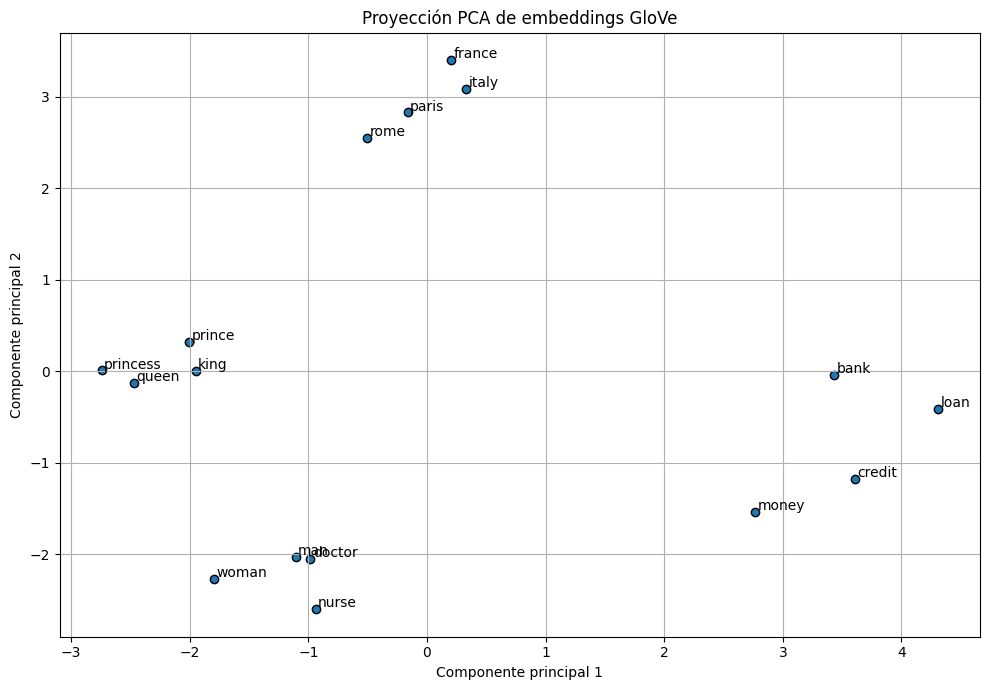

In [3]:
# Descargar el modelo preentrenado GloVe de 50 dimensiones
model = api.load("glove-wiki-gigaword-50")

# Lista de palabras que queremos proyectar
words = [
    "king", "queen", "man", "woman", "prince", "princess",
    "paris", "france", "rome", "italy", "doctor", "nurse",
    "loan", "credit", "bank", "money"
]

# Obtener los vectores de esas palabras
vectors = np.array([model[word] for word in words])

# Aplicar reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Graficar los puntos
plt.figure(figsize=(10, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k')

for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word)

plt.title("Proyección PCA de embeddings GloVe")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# LLM

## Datos del LLM

In [4]:
split1_llm = {'llm_train': {'Accuracy': 0.8160980247174395, 'Precision': 0.04, 'Recall': 0.0005820721769499418,
                            'F1 Score': 0.0011474469305794606, 'Balanced Accuracy': np.float64(0.4987424491740344),
                            'tp': 1, 'fp': 24, 'fn': 1717, 'tn': 7725},
              'llm_val': {'Accuracy': 0.7091611479028698, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                          'Balanced Accuracy': np.float64(0.4965224111282844), 'tp': 0, 'fp': 9, 'fn': 518, 'tn': 1285},
              'llm_test': {'Accuracy': 0.790834312573443, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                           'Balanced Accuracy': np.float64(0.5), 'tp': 0, 'fp': 0, 'fn': 534, 'tn': 2019}}

split2_llm = {'llm_train': {'Accuracy': 0.6579856497475418, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                            'Balanced Accuracy': np.float64(0.49798873692679),'tp': 0,'fp': 10, 'fn': 1277, 'tn': 2476},
              'llm_val': {'Accuracy': 0.790834312573443, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                          'Balanced Accuracy': np.float64(0.5), 'tp': 0, 'fp': 0, 'fn': 534, 'tn': 2019},
              'llm_test': {'Accuracy': 0.7911561001598295, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                           'Balanced Accuracy': np.float64(0.5), 'tp': 0, 'fp': 0, 'fn': 392, 'tn': 1485}}

split3_llm = {'llm_train': {'Accuracy': 0.747594050743657, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                            'Balanced Accuracy': np.float64(0.4986868981616574),'tp': 0,'fp': 9,'fn': 1145,'tn': 3418},
              'llm_val': {'Accuracy': 0.7911561001598295, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                          'Balanced Accuracy': np.float64(0.5), 'tp': 0, 'fp': 0, 'fn': 392, 'tn': 1485},
              'llm_test': {'Accuracy': 0.5484375, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0,
                           'Balanced Accuracy': np.float64(0.5), 'tp': 0, 'fp': 0, 'fn': 289, 'tn': 351}}

In [5]:
splits_llm = [split1_llm, split2_llm, split3_llm]
resumen_llm = resumir_resultados_modelo(splits_llm, nombre_modelo="llm")

In [6]:
resumen_llm

,Modelo,Fase,Accuracy,Precision,Recall,F1 Score,Balanced Accuracy
0,llm,train,0.7406,0.0133,0.0002,0.0004,0.4985
1,llm,val,0.7637,0.0000,0.0000,0.0000,0.4988
2,llm,test,0.7101,0.0000,0.0000,0.0000,0.5000


# LoRA

## Ejemplo de LoRA con matriz 3x3

In [7]:
# Entrada (vector de dimensión 3)
x = np.array([1.0, 2.0, -1.0])  # shape: (3,)

# Pesos originales (W) congelados
W = np.array([
    [0.2, -0.1,  0.4],
    [0.0,  0.3, -0.2],
    [-0.5, 0.1,  0.6]
])  # shape: (3, 3)

# Caso 1: salida sin LoRA
y_sin_lora = W @ x

# LoRA con r = 1
r = 1
A = np.array([[0.1, 0.2, -0.3]])     # shape: (1, 3)
B = np.array([[0.5], [-0.4], [1.0]]) # shape: (3, 1)

# Caso 2: LoRA sin escalado → ΔW = B @ A
delta_W_simple = B @ A
W_lora_simple = W + delta_W_simple
y_lora_simple = W_lora_simple @ x

# Caso 3: LoRA con escalado → ΔW = (α/r) * B @ A
alpha = 32
scaling = alpha / r
delta_W_scaled = scaling * (B @ A)
W_lora_scaled = W + delta_W_scaled
y_lora_scaled = W_lora_scaled @ x

# Mostrar resultados
np.set_printoptions(precision=3, suppress=True)
print("Entrada x:", x)

print("\nMatriz W (original):")
print(W)

print("\nDelta W (LoRA sin escalar):")
print(delta_W_simple)

print("\nDelta W (LoRA escalada, alpha/r = {:.1f}):".format(scaling))
print(delta_W_scaled)

print("\nSalida sin LoRA:")
print(y_sin_lora)

print("\nSalida con LoRA (sin escalar):")
print(y_lora_simple)

print("\nSalida con LoRA (escalada):")
print(y_lora_scaled)


Entrada x: [ 1.  2. -1.]

Matriz W (original):
[[ 0.2 -0.1  0.4]
 [ 0.   0.3 -0.2]
 [-0.5  0.1  0.6]]

Delta W (LoRA sin escalar):
[[ 0.05  0.1  -0.15]
 [-0.04 -0.08  0.12]
 [ 0.1   0.2  -0.3 ]]

Delta W (LoRA escalada, alpha/r = 32.0):
[[ 1.6   3.2  -4.8 ]
 [-1.28 -2.56  3.84]
 [ 3.2   6.4  -9.6 ]]

Salida sin LoRA:
[-0.4  0.8 -0.9]

Salida con LoRA (sin escalar):
[ 0.    0.48 -0.1 ]

Salida con LoRA (escalada):
[12.4  -9.44 24.7 ]


## Training Loss de LoRA (con train1)

<img src="LossTrain1_LoRA.png" width="150">

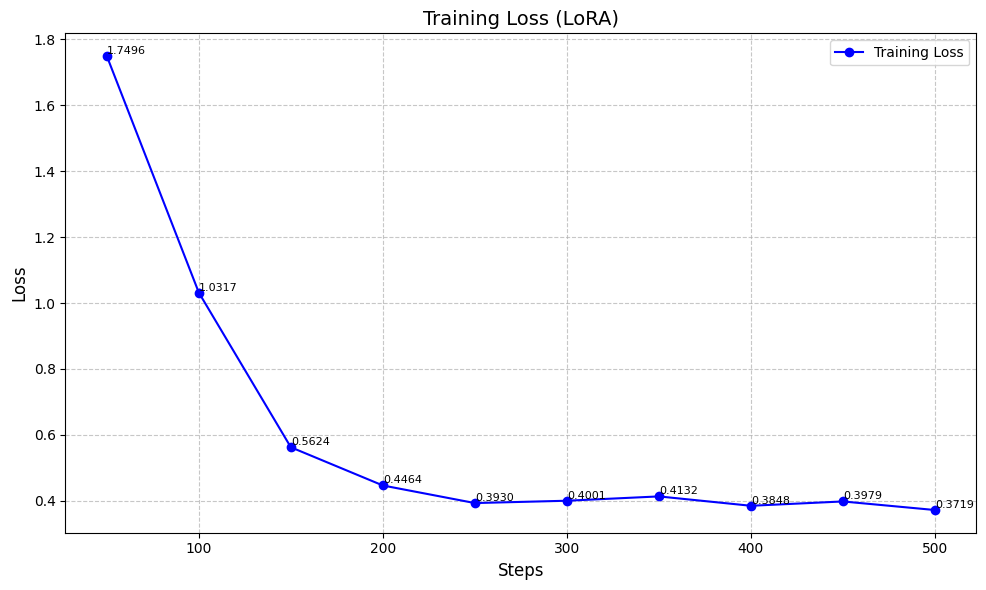

In [8]:
# Datos de la tabla
steps = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
training_loss = [1.749600, 1.031700, 0.562400, 0.446400, 0.393000,
                 0.400100, 0.413200, 0.384800, 0.397900, 0.371900]

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.plot(steps, training_loss, marker='o', linestyle='-', color='b', label='Training Loss')

# Ejes y título
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss (LoRA)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula

# Añadir etiquetas para los puntos
for i, (x, y) in enumerate(zip(steps, training_loss)):
    plt.text(x, y, f"{y:.4f}", fontsize=8, va='bottom')

# Mostrar leyenda y gráfico
plt.legend()
plt.tight_layout()
plt.show()

## Datos de LoRA

In [9]:
split1_lora = {'lora_train': {'Accuracy': 0.1816837435301574, 'Precision': 0.1815108293713682, 'Recall': 1.0,
                              'F1 Score': 0.30725207904855584, 'Balanced Accuracy': np.float64(0.5001290489095367),
                              'tp': 1718, 'fp': 7747, 'fn': 0, 'tn': 2},
               'lora_val': {'Accuracy': 0.2858719646799117, 'Precision': 0.2858719646799117, 'recall': 1.0,
                            'F1 Score': 0.4446351931330472, 'Balanced Accuracy': np.float64(0.5), 'tp': 518,'fp': 1294,
                            'fn': 0, 'tn': 0}, 
               'lora_test': {'Accuracy': 0.4888366627497062, 'Precision': 0.25272610647851185, 
                             'Recall': 0.7378277153558053, 'F1 Score': 0.3764930721452461,
                             'Balanced Accuracy': np.float64(0.5804046947259462), 'tp': 394, 'fp': 1165, 'fn': 140,
                             'tn': 854}}

split2_lora = {'lora_train': {'Accuracy': 0.3478607494020728, 'Precision': 0.34107480421280045, 
                              'Recall': 0.9890368050117463, 'F1 Score': 0.5072289156626506,
                              'Balanced Accuracy': np.float64(0.503770212642639), 'tp': 1263, 'fp': 2440, 'fn': 14,
                              'tn': 46},
               'lora_val': {'Accuracy': 0.31139835487661577, 'Precision': 0.216404077849861, 
                            'Recall': 0.8745318352059925, 'F1 Score': 0.34695393759286774, 
                            'Balanced Accuracy': np.float64(0.5184942484598561), 'tp': 467, 'fp': 1691, 'fn': 67,
                            'tn': 328},
               'lora_test': {'Accuracy': 0.3036760788492275, 'Precision': 0.19762062128222074, 
                             'Recall': 0.7627551020408163, 'F1 Score': 0.31391076115485567,
                             'Balanced Accuracy': np.float64(0.4726233422661994), 'tp': 299, 'fp': 1214, 'fn': 93,
                             'tn': 271}}

split3_lora = {'lora_train': {'Accuracy': 0.29133858267716534, 'Precision': 0.2564519879097884,
                              'Recall': 0.9633187772925764, 'F1 Score': 0.4050679397723099, 
                              'Balanced Accuracy': np.float64(0.5150705354218937), 'tp': 1103, 'fp': 3198, 'fn': 42,
                              'tn': 229},
               'lora_val': {'Accuracy': 0.24134256792754397, 'Precision': 0.2, 'Recall': 0.8775510204081632,
                            'F1 Score': 0.32575757575757575, 'Balanced Accuracy': np.float64(0.4754758469044183),
                            'tp': 344, 'fp': 1376, 'fn': 48, 'tn': 109},
               'lora_test': {'Accuracy': 0.4859375, 'Precision': 0.4619771863117871, 'Recall': 0.8408304498269896,
                             'F1 Score': 0.596319018404908, 'Balanced Accuracy': np.float64(0.5172813217795916),
                             'tp': 243, 'fp': 283, 'fn': 46, 'tn': 68}}

In [10]:
splits_lora= [split1_lora, split2_lora, split3_lora]
resumen_lora = resumir_resultados_modelo(splits_lora, nombre_modelo="lora")

In [11]:
resumen_lora

,Modelo,Fase,Accuracy,Precision,Recall,F1 Score,Balanced Accuracy
0,lora,train,0.2736,0.2597,0.9841,0.4065,0.5063
1,lora,val,0.2795,0.2341,0.8760,0.3724,0.4980
2,lora,test,0.4262,0.3041,0.7805,0.4289,0.5234


# Gráfica comparativa entre LLM y LoRA

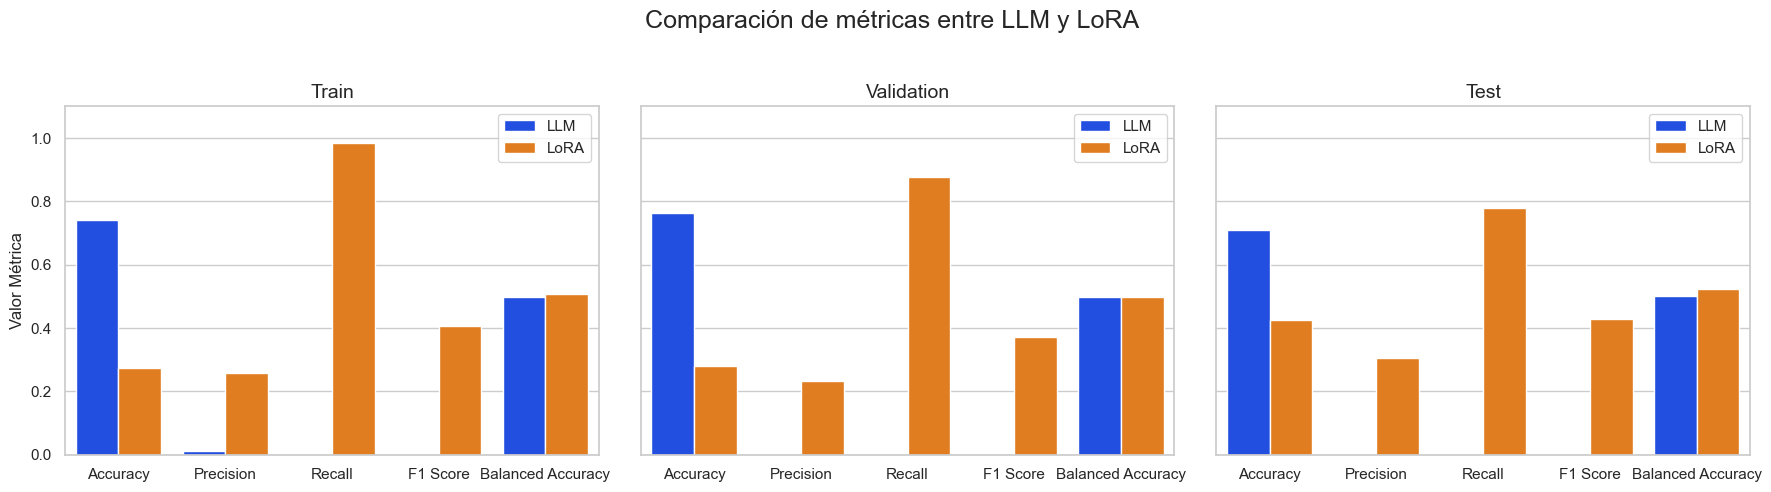

In [12]:
# Aplicar normalización
resumen_llm = normalizar_resumen(resumen_llm)
resumen_lora = normalizar_resumen(resumen_lora)

# Unir ambos resultados
resumen_llm["Modelo"] = "LLM"
resumen_lora["Modelo"] = "LoRA"
df_comparacion = pd.concat([resumen_llm, resumen_lora])

# Reformatear a formato largo para graficar
df_melted = df_comparacion.melt(
    id_vars=["Modelo", "Fase"], 
    value_vars=["Accuracy", "Precision", "Recall", "F1 Score", "Balanced Accuracy"],
    var_name="Métrica", value_name="Valor Métrica"
)

# Orden personalizado
orden_metricas = ["Accuracy", "Precision", "Recall", "F1 Score", "Balanced Accuracy"]
orden_fases = ["Train", "Validation", "Test"]

# Estilo y subgráficas
sns.set(style="whitegrid", palette="bright")
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, fase in enumerate(orden_fases):
    subset = df_melted[df_melted["Fase"] == fase]
    sns.barplot(
        data=subset, x="Métrica", y="Valor Métrica", hue="Modelo", 
        ax=axes[i], palette="bright", order=orden_metricas
    )
    axes[i].set_title(f"{fase}", fontsize=14)
    axes[i].set_ylim(0, 1.1)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Valor Métrica" if i == 0 else "")
    axes[i].legend().set_title("")

# Título general
plt.suptitle("Comparación de métricas entre LLM y LoRA", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Gráfica comparativa entre modelos clásicos de ML, LLM y LoRA

<img src="ResultadosVal.png" width="500">

Para cada modelo clásico se ha considerado tanto su versión base como la ajustada, seleccionando aquella que presenta un mayor valor de F1-Score en validación. A continuación se comparan los resultados:

- **Regresión Logística**: $ 0.5912 < 0.5978 $
- **Árbol de Decisión**: $ 0.4478 < 0.5518 $
- **Random Forest**: $ 0.5480 < 0.5703 $
- **XGBoost**: $ 0.5698 < 0.6002 $
- **Red Neuronal**: $ 0.5895 > 0.4335 $

Por tanto, se seleccionan las versiones ajustadas de **Regresión Logística**, **Árbol de Decisión**, **Random Forest** y **XGBoost**, y la versión base de **Red Neuronal**, al ser esta la que ofrece mejor rendimiento en términos de F1-Score. Estos cinco modelos serán los utilizados para la evaluación final en el conjunto de test.

<img src="ResultadosTest.png" width="500">

In [13]:
# Diccionario de resultados
resultados_precision_recall = {
    "Regresión Logística": {"Precision": 0.6676, "Recall": 0.5913},
    "Árbol de Decisión": {"Precision": 0.6684, "Recall": 0.7629},
    "Random Forest": {"Precision": 0.6378, "Recall": 0.6956},
    "XGBoost": {"Precision": 0.6973, "Recall": 0.6737},
    "Red Neuronal": {"Precision": 0.7313, "Recall": 0.6072}, 
    "LLM": {"Precision": 0.0000, "Recall": 0.0000},
    "LoRA": {"Precision": 0.3041, "Recall": 0.7805}
}

# Crear DataFrame a partir del diccionario
df_final = pd.DataFrame.from_dict(resultados_precision_recall, orient='index').reset_index()
df_final = df_final.rename(columns={"index": "Modelo"})

df_final

,Modelo,Precision,Recall
0,Regresión Logística,0.6676,0.5913
1,Árbol de Decisión,0.6684,0.7629
2,Random Forest,0.6378,0.6956
3,XGBoost,0.6973,0.6737
4,Red Neuronal,0.7313,0.6072
5,LLM,0.0000,0.0000
6,LoRA,0.3041,0.7805


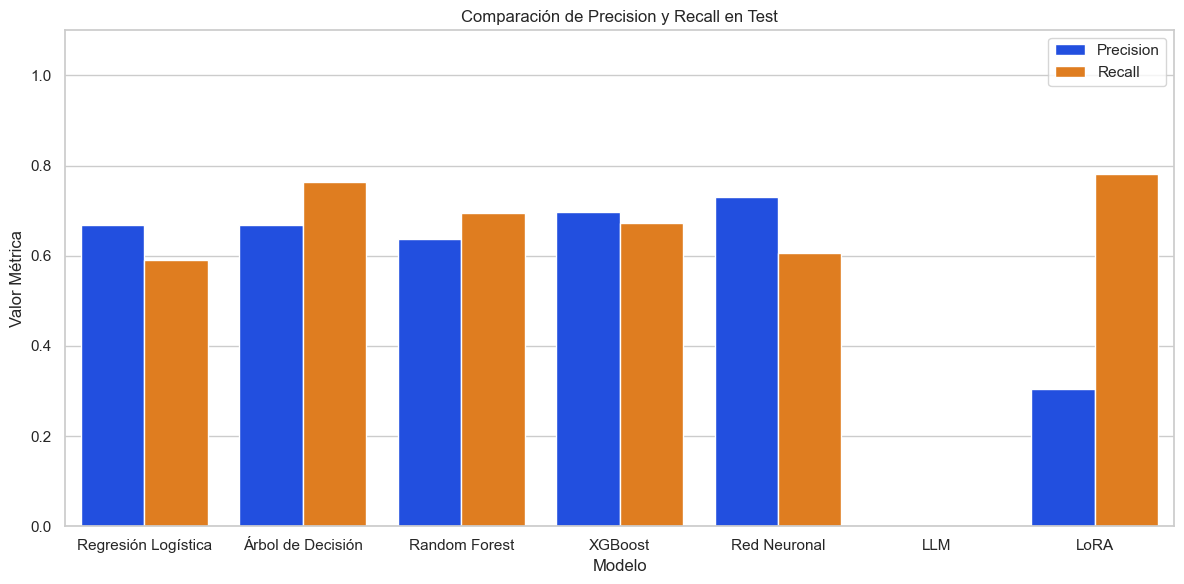

In [14]:
# Derretir para graficar
df_melted = df_final.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Modelo", y="Valor", hue="Métrica", palette="bright")
plt.title("Comparación de Precision y Recall en Test")
plt.ylim(0, 1.1)
plt.ylabel("Valor Métrica")
plt.grid(True, axis="y")
plt.legend(title="")
plt.tight_layout()
plt.show()